# **Considering the Registration number to be number of filters in each layer**

Registration No. : 400517

400517 * 7.8 = 3124032.6 = 3124033

Rounding each to the nearest odd: 3135133

### **Install libraries**


In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


### **Import Libraries**

In [2]:
import numpy as np
from tensorflow.keras import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

### **Split the data to train and test set**

In [3]:
(X, y), (test_X, test_y) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


### ***Dividing the train set to train and validation set***

In [4]:
train_X = X[:47000]
train_y = y[:47000]
val_X = X[-3000:]
val_y = y[-3000:]

### **Building the Architecture**

In [5]:
input = Input(shape=(32, 32, 3)) #3135133
x = layers.Conv2D(3, (3,3), activation='relu',padding='same')(input)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(1, (3,3), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(3, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(5, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(1, (3,3), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(3, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(3, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x= layers.Dense(10)(x)
output = layers.Activation('softmax')(x)
model = Model(inputs=input, outputs=output,name="TF_Functional_API")
model.summary()

Model: "TF_Functional_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 3)         84        
                                                                 
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 1)         28        
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 1)         4         
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 1)   

### **Compiling the model .Training and evaluating on the test set**

In [6]:
model.compile(loss=losses.SparseCategoricalCrossentropy(),optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(train_X, train_y.flatten(), batch_size=64, epochs=30, validation_data=(val_X,val_y.flatten()))
model.evaluate(test_X, test_y.flatten(), verbose=2)

Epoch 1/30
735/735 [==============================] - 23s 11ms/step - loss: 1.9990 - accuracy: 0.2734 - val_loss: 1.8539 - val_accuracy: 0.3023
Epoch 2/30
735/735 [==============================] - 7s 10ms/step - loss: 1.7497 - accuracy: 0.3660 - val_loss: 1.6220 - val_accuracy: 0.4183
Epoch 3/30
735/735 [==============================] - 8s 10ms/step - loss: 1.5957 - accuracy: 0.4271 - val_loss: 1.5417 - val_accuracy: 0.4443
Epoch 4/30
735/735 [==============================] - 7s 9ms/step - loss: 1.4834 - accuracy: 0.4677 - val_loss: 1.5078 - val_accuracy: 0.4677
Epoch 5/30
735/735 [==============================] - 8s 11ms/step - loss: 1.3794 - accuracy: 0.5065 - val_loss: 1.4232 - val_accuracy: 0.4980
Epoch 6/30
735/735 [==============================] - 7s 9ms/step - loss: 1.2908 - accuracy: 0.5379 - val_loss: 1.4667 - val_accuracy: 0.4980
Epoch 7/30
735/735 [==============================] - 9s 12ms/step - loss: 1.2030 - accuracy: 0.5727 - val_loss: 1.4534 - val_accuracy: 0.4887


[3.1211116313934326, 0.4812000095844269]

### **Plot training and validation loss curves**

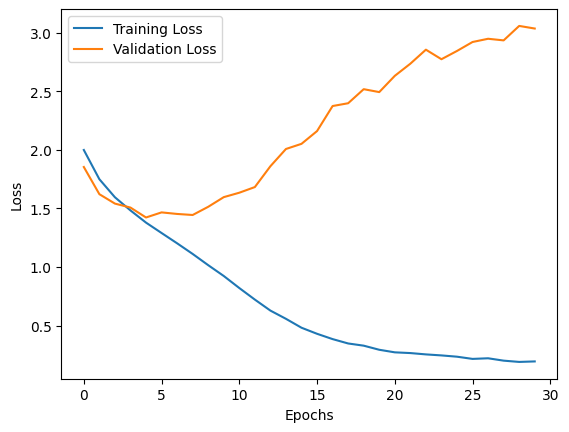

In [7]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Plot training and validation loss curves**

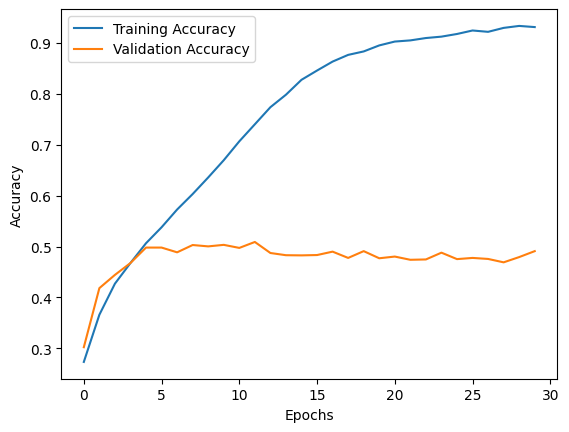

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Making Predictions**

1/1 [==============================] - 0s 21ms/step


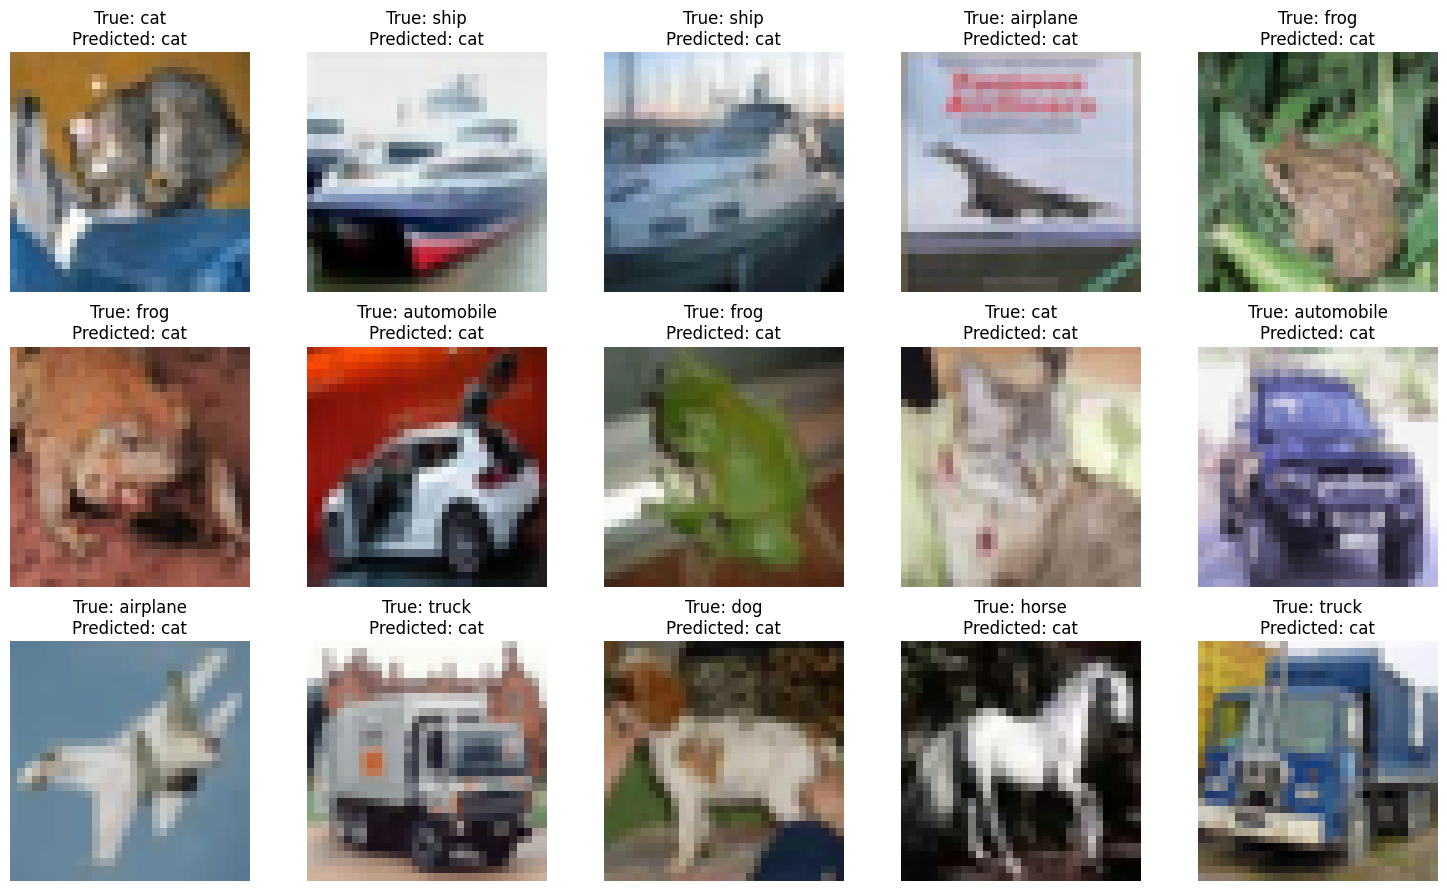

In [13]:
# Set the number of images to display
num_images = 15
num_rows = 3
num_cols = num_images // num_rows

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(num_rows):
    for j in range(num_cols):
        # Choose an index for the image you want to predict
        index_to_predict = i * num_cols + j  # Change this to the index you want to use

        # Choose an image for prediction
        image_to_predict = test_X[index_to_predict]
        true_label = test_y[index_to_predict]

        # Reshape and normalize the image
        image_to_predict = image_to_predict.reshape(1, 32, 32, 3) / 255.0

        # Use the trained model to predict the label
        predicted_label = np.argmax(model.predict(image_to_predict))

        # Display the image and true/predicted labels in subplots
        axes[i, j].imshow(test_X[index_to_predict])
        axes[i, j].set_title(f'True: {class_names[true_label[0]]}\nPredicted: {class_names[predicted_label]}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


### **Visualizing the architecture**

In [10]:
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 16.2 MB/s eta 0:00:00


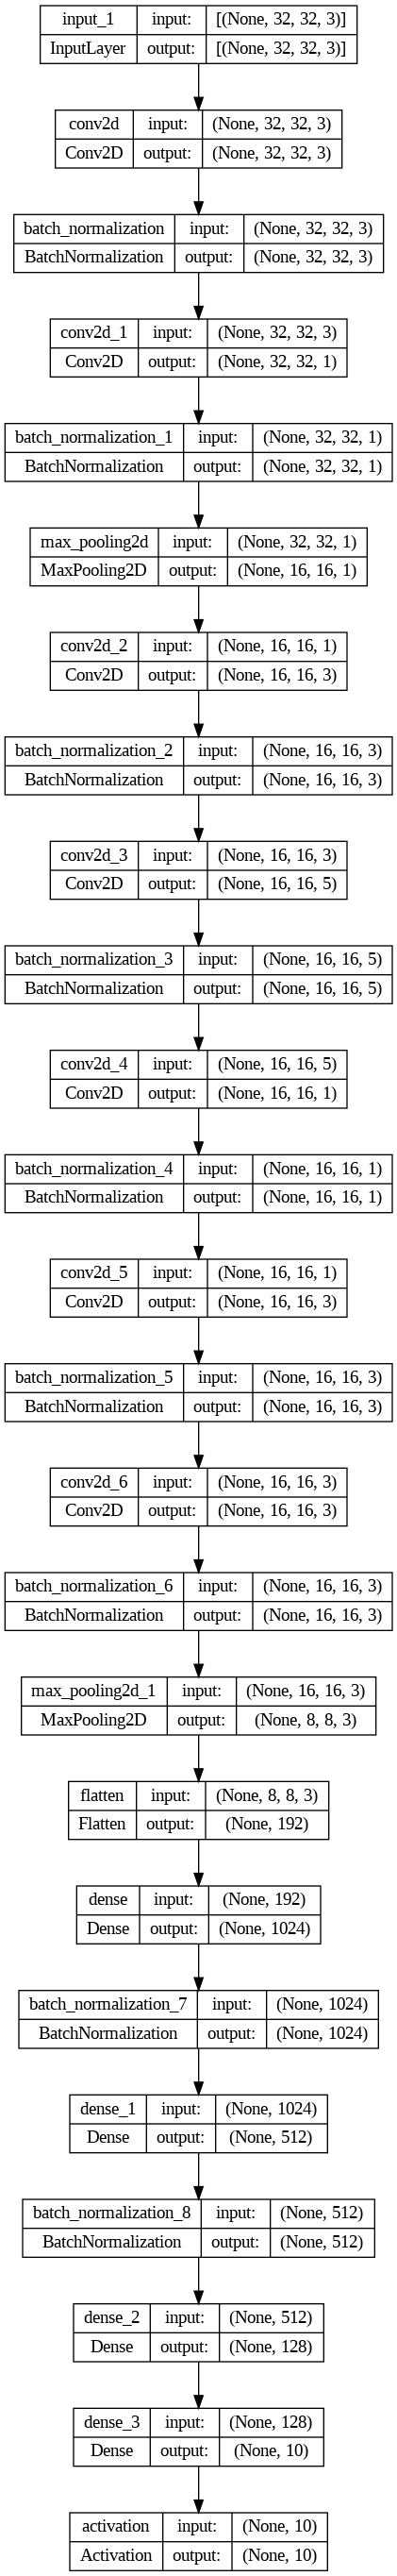

In [11]:
# Visualize the model architecture
from tensorflow.keras.utils import plot_model

visualkeras.layered_view(model).show()

# Save the model architecture diagram to a file
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)